In [4]:
 import numpy as np 
 import pandas as pd 
 import matplotlib as plt
 import seaborn as sns
 from sklearn.impute import SimpleImputer
 from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [5]:
raw_train=pd.read_csv('E:\\DATA\\nachiket_mlops_loan dataset\\train.csv')

raw_test=pd.read_csv('E:\\DATA\\nachiket_mlops_loan dataset\\test.csv')

In [6]:
raw_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [7]:
raw_train.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [8]:
train_df=raw_train.copy()
test_df=raw_test.copy()

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            362 non-null    object 
 1   Gender             351 non-null    object 
 2   Married            362 non-null    object 
 3   Dependents         353 non-null    object 
 4   Education          362 non-null    object 
 5   Self_Employed      339 non-null    object 
 6   ApplicantIncome    362 non-null    int64  
 7   CoapplicantIncome  362 non-null    int64  
 8   LoanAmount         362 non-null    int64  
 9   Loan_Amount_Term   356 non-null    float64
 10  Credit_History     333 non-null    float64
 11  Property_Area      362 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 34.1+ KB


In [11]:
train_y=train_df['Loan_Status']

In [12]:
train_df.drop('Loan_Status',axis=1,inplace=True)

In [13]:
train_df.drop('Loan_ID',axis=1,inplace=True)
test_df.drop('Loan_ID',axis=1,inplace=True)

In [14]:
train_df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [15]:
train_df[train_df.duplicated()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area


In [16]:
test_df[test_df.duplicated()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
192,Male,No,0,Graduate,Yes,5833,0,116,360.0,1.0,Urban


In [17]:
test_df.drop_duplicates(inplace=True)

In [18]:
test_df[test_df.duplicated()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area


In [19]:
train_df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
dtype: int64

In [20]:
# Numerical ---> mean
# categorical ---> mode 

In [21]:
num_col=train_df.select_dtypes(exclude='object')

num_col.drop('Credit_History',axis=1,inplace=True)
num_col=num_col.columns
num_col.to_list()

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [22]:
cat_col=test_df.select_dtypes(include='object').columns.to_list()

cat_col.append('Credit_History')
cat_col

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Credit_History']

In [23]:
cat_imputer=SimpleImputer(strategy='most_frequent')

train_df[cat_col]=cat_imputer.fit_transform(train_df[cat_col])
test_df[cat_col]=cat_imputer.fit_transform(test_df[cat_col])

In [24]:
num_imputer=SimpleImputer(strategy='mean')

train_df[num_col]=cat_imputer.fit_transform(train_df[num_col])
test_df[num_col]=cat_imputer.fit_transform(test_df[num_col])

In [25]:
test_df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [26]:
# Preprocessing as domain knowldge 

In [27]:
train_df['ApplicantIncome'] = train_df['ApplicantIncome'] + train_df['CoapplicantIncome']
test_df['ApplicantIncome'] = test_df['ApplicantIncome'] + test_df['CoapplicantIncome']

# Dropping Coapplicant Income 

train_df.drop('CoapplicantIncome',axis=1,inplace=True)
test_df.drop('CoapplicantIncome',axis=1,inplace=True)

In [28]:
train_df[cat_col]

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Credit_History
0,Male,No,0,Graduate,No,Urban,1.0
1,Male,Yes,1,Graduate,No,Rural,1.0
2,Male,Yes,0,Graduate,Yes,Urban,1.0
3,Male,Yes,0,Not Graduate,No,Urban,1.0
4,Male,No,0,Graduate,No,Urban,1.0
...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural,1.0
610,Male,Yes,3+,Graduate,No,Rural,1.0
611,Male,Yes,1,Graduate,No,Urban,1.0
612,Male,Yes,2,Graduate,No,Urban,1.0


In [29]:
for cat in cat_col:
    le=LabelEncoder()
    train_df[cat]=le.fit_transform(train_df[cat])
    test_df[cat]=le.fit_transform(test_df[cat])

5.633448514884535

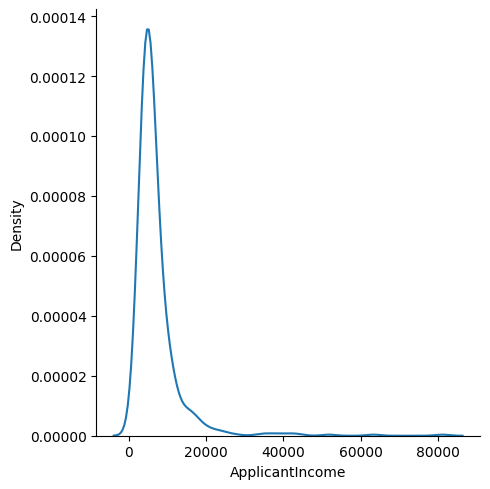

In [30]:
sns.displot(train_df['ApplicantIncome'],kind='kde')
train_df['ApplicantIncome'].skew()

2.7454067641709576

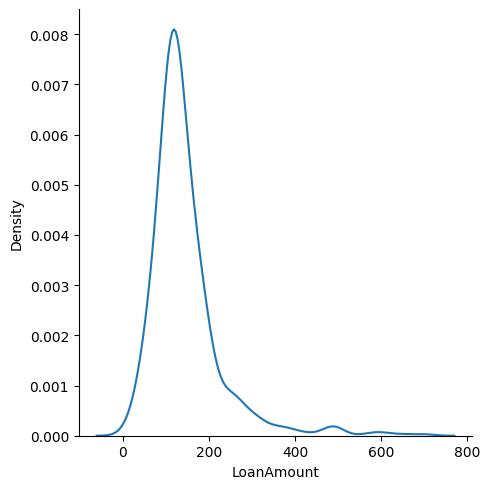

In [31]:
sns.displot(train_df['LoanAmount'],kind='kde')
train_df['LoanAmount'].skew()

In [32]:
num_col=num_col.drop('CoapplicantIncome')

In [33]:
train_df[num_col]=np.log(train_df[num_col])

In [34]:
test_df[num_col]=np.log(test_df[num_col])

In [35]:
# Scaling 

scaler=MinMaxScaler()

train_df=scaler.fit_transform(train_df)
test_df=scaler.fit_transform(test_df)

In [36]:
# Build the model

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(train_df,train_y,test_size=0.3,random_state=0)

In [37]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [38]:
y_pred_test=log.predict(X_test)

In [39]:
from sklearn.metrics import  accuracy_score, confusion_matrix
acc=accuracy_score(y_test,y_pred_test)
print(f"Accuracy is {acc}")

Accuracy is 0.827027027027027


In [40]:
# Serialization

import joblib
joblib.dump(log,"my_trained_model_1.pkl")

['my_trained_model_1.pkl']

In [41]:
import sys

In [42]:
sys.path

['e:\\My Projects\\mlops_project',
 'C:\\Users\\Himanshu Choudhary\\AppData\\Local\\Programs\\Python\\Python312\\python312.zip',
 'C:\\Users\\Himanshu Choudhary\\AppData\\Local\\Programs\\Python\\Python312\\DLLs',
 'C:\\Users\\Himanshu Choudhary\\AppData\\Local\\Programs\\Python\\Python312\\Lib',
 'C:\\Users\\Himanshu Choudhary\\AppData\\Local\\Programs\\Python\\Python312',
 'e:\\My Projects\\mlops_project\\venv',
 '',
 'e:\\My Projects\\mlops_project\\venv\\Lib\\site-packages',
 'e:\\My Projects\\mlops_project\\venv\\Lib\\site-packages\\win32',
 'e:\\My Projects\\mlops_project\\venv\\Lib\\site-packages\\win32\\lib',
 'e:\\My Projects\\mlops_project\\venv\\Lib\\site-packages\\Pythonwin']

In [43]:
test_d=pd.read_csv(r"E:\My Projects\mlops_project\prediction_model\dataset\test.csv")

In [44]:
# Add this code snippet to the end of your script to check for missing values
missing_values = test_d.isnull().sum()
print("Missing values per feature:")
print(missing_values)


Missing values per feature:
Loan_ID               0
Gender               11
Married               0
Dependents            9
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [50]:
dict={'a':1,'nan',3,'nan','b':3,4,'nan',7,'d':'a','b','nan','d'}
demo=pd.DataFrame(dict)

SyntaxError: ':' expected after dictionary key (2270930108.py, line 1)

In [45]:
from sklearn.base import BaseEstimator , TransformerMixin
from prediction_model.config import config
import numpy as np


class Mean_Imputer(BaseEstimator ,TransformerMixin):
    def __init__(self, variable = None):
        self.variable = variable

    def fit(self,X,y= None):
        self.mean_dict = {}
        for col in self.variable:
            self.mean_dict[col]=X[col].mean()
        return self

    def transform(self,X):
        X=X.copy()
        for col in self.variable:
            X[col]=X[col].fillna(self.mean_dict[col])
        print("Num imputation done")
        return X

        

class mode_Imputer(BaseEstimator ,TransformerMixin):
    def __init__(self, variable = None):
        self.variable = variable

    def fit(self,X,y= None):
        self.mode_dict = {}
        for col in self.variable:
            self.mode_dict[col]=X[col].mode()
        return self

    def transform(self,X):
        X=X.copy()
        for col in self.variable:
            X[col]=X[col].fillna(self.mode_dict[col])
        print("cat imputation done")
        return X


In [46]:
Mean_Imputer(test_d)

Mean_Imputer(variable=      Loan_ID Gender Married Dependents     Education Self_Employed  \
0    LP001015   Male     Yes          0      Graduate            No   
1    LP001022   Male     Yes          1      Graduate            No   
2    LP001031   Male     Yes          2      Graduate            No   
3    LP001035   Male     Yes          2      Graduate            No   
4    LP001051   Male      No          0  Not Graduate            No   
..        ...    ...     ...        ...           ...           ...   
357  LP002971   Male     Yes         3+  Not Graduate           Yes   
358  LP002975   Male     Yes          0      Graduate            No   
359  LP002980   Male      No          0      Graduate            No   
360  LP002986   Male     Yes          0      Graduate...
     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5720                  0         110             360.0   
1               3076               1500         126             360.0   
2               5000               1800         208             360.0   
3               2340               2546         100             360.0   
4               3276                  0          78             360.0   
..               ...                ...         ...               ...   
357             4009               1777         113             360.0   
358             4158                709         115             360.0   
359             3250               1993         126             360.0   
360             5000               2393         158             360.0   
361             9200                  0          98             180.0   

     Credit_History Property_Area  
0               1.0         Urban  
1               1.0         Urban  
2               1.0         Urban  
3               NaN         Urban  
4               1.0         Urban  
..              ...           ...  
357             1.0         Urban  
358             1.0         Urban  
359             NaN     Semiurban  
360             1.0         Rural  
361             1.0         Rural  

[362 rows x 12 columns])

In [47]:
mode_Imputer(test_d)

mode_Imputer(variable=      Loan_ID Gender Married Dependents     Education Self_Employed  \
0    LP001015   Male     Yes          0      Graduate            No   
1    LP001022   Male     Yes          1      Graduate            No   
2    LP001031   Male     Yes          2      Graduate            No   
3    LP001035   Male     Yes          2      Graduate            No   
4    LP001051   Male      No          0  Not Graduate            No   
..        ...    ...     ...        ...           ...           ...   
357  LP002971   Male     Yes         3+  Not Graduate           Yes   
358  LP002975   Male     Yes          0      Graduate            No   
359  LP002980   Male      No          0      Graduate            No   
360  LP002986   Male     Yes          0      Graduate...
     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5720                  0         110             360.0   
1               3076               1500         126             360.0   
2               5000               1800         208             360.0   
3               2340               2546         100             360.0   
4               3276                  0          78             360.0   
..               ...                ...         ...               ...   
357             4009               1777         113             360.0   
358             4158                709         115             360.0   
359             3250               1993         126             360.0   
360             5000               2393         158             360.0   
361             9200                  0          98             180.0   

     Credit_History Property_Area  
0               1.0         Urban  
1               1.0         Urban  
2               1.0         Urban  
3               NaN         Urban  
4               1.0         Urban  
..              ...           ...  
357             1.0         Urban  
358             1.0         Urban  
359             NaN     Semiurban  
360             1.0         Rural  
361             1.0         Rural  

[362 rows x 12 columns])

In [48]:
missing = test_d.isnull().sum()

In [49]:
missing

Loan_ID               0
Gender               11
Married               0
Dependents            9
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64